In [1]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.35:
            print()
            print("Loss is low so cancelling training.")
            self.model.stop_training = True

print("\nVersiones:")
print(f"- Python {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
print(f"- TensorFlow {tf.__version__}")
print(f"- tf.Keras {tf.keras.__version__}")


Versiones:
- Python 3.9.23
- TensorFlow 2.18.0
- tf.Keras 3.10.0


In [2]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#007700")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label]. set_color('black')

In [3]:
# Dataset Fashion-MNIST, que está en storage.googleapis.com en TensorFlow/Keras
# Tenemos 4 matrices (tensores) organizados en dos tuplas (listas solo lectura)
# train_images: Matriz con imágenes de entrenamiento
# train_labels: Matriz con las etiquetas de las imágenes de entrenamiento
# test_images: Matriz con imágenes de prueba
# test_labels: Matriz con las etiquetas de las imágenes de prueba
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Dataset (entrenamiento y test) cargado.")

Dataset (entrenamiento y test) cargado.


In [4]:
# Lista con los nombres de las clases de ropa
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Normalizacion de las matrices de imágenes de entrenamiento y test: int->float y [0-255] -> [0-1]
print("Normalización de entrenamiento y test: int->float y [0-255] -> [0-1]")
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Normalización de entrenamiento y test: int->float y [0-255] -> [0-1]



Dataset check:
- tran_images shape:  (60000, 28, 28)
- train_labels len:  60000
- test_images shape:  (10000, 28, 28)
- test_labels len:  10000
- class_names len:  10
- train_labels:  [9 0 0 ... 3 0 5]


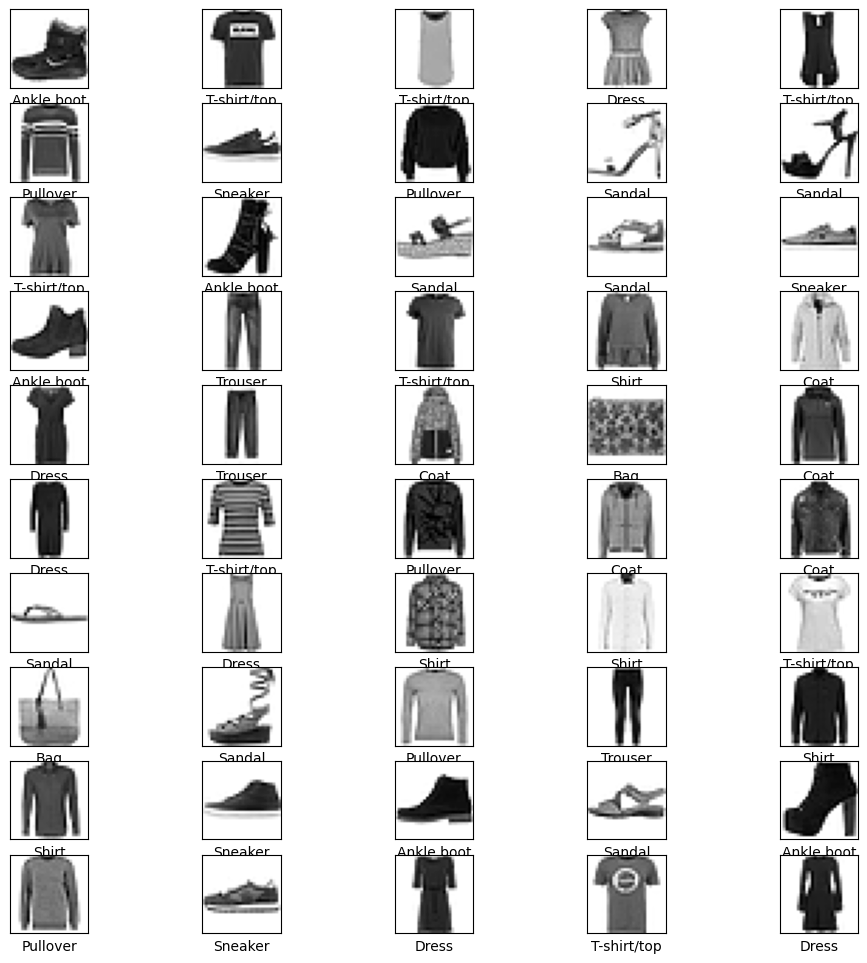

In [6]:
# Best practice - comprobar la forma de los datos
print("\nDataset check:")
print("- tran_images shape: ", train_images.shape)
print("- train_labels len: ", len(train_labels))
print("- test_images shape: ", test_images.shape)
print("- test_labels len: ", len(test_labels))
print("- class_names len: ", len(class_names))
print("- train_labels: ", train_labels)

plt.figure(figsize=(12,12))
for i in range (50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# Definición del modelo
print("Definición del modelo")
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Definición del modelo


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
print("Compilación del modelo")
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

Compilación del modelo


In [9]:
# Entrenamiento del modelo
print("Entrenamiento del modelo")
history = model.fit(train_images, train_labels, epochs=30, callbacks=[myCallBack()])

Entrenamiento del modelo
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6046 - loss: 1.3528
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8080 - loss: 0.5940
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8346 - loss: 0.4954
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8477 - loss: 0.4460
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8507 - loss: 0.4329
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8564 - loss: 0.4115
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8592 - loss: 0.4030
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8623 - loss: 0.3955
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8642 - loss: 0.3856
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8652 - loss: 0.3835
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8692 - loss: 0

In [10]:
#Evaluación del modelo usando los datos de Validación o Evaluación
#Son datos no se han usado para el entrenamiento
print("Evaluación:")
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {int(test_acc*100)}%")




Evaluación:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8479 - loss: 0.4202
Test accuracy: 84%


In [11]:
# Guardo el modelo en disco
print("Saving the model")
model.save("./mnist-fashion.keras")

Saving the model


In [12]:
# Leo el modelo de disco
print("Loading the model")
model = keras.models.load_model("./mnist-fashion.keras")

Loading the model


Predict: hago que el modelo evalúe todas las imágenes de Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[2.2793380e-03 9.9700677e-01 2.2457343e-05 3.4756266e-04 1.3235908e-04
 6.1962933e-06 1.7567235e-04 5.0133977e-09 4.7976819e-06 2.4795221e-05]
El modelo reconoce:  1
Etiqueta correcta:  1


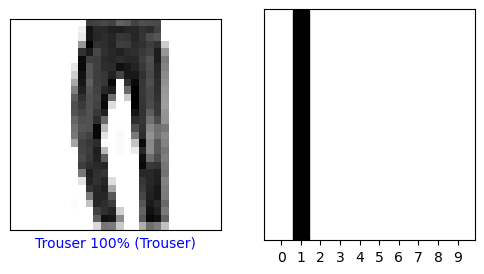

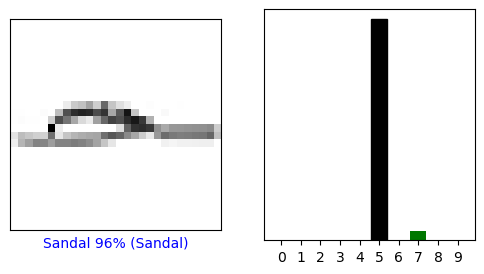

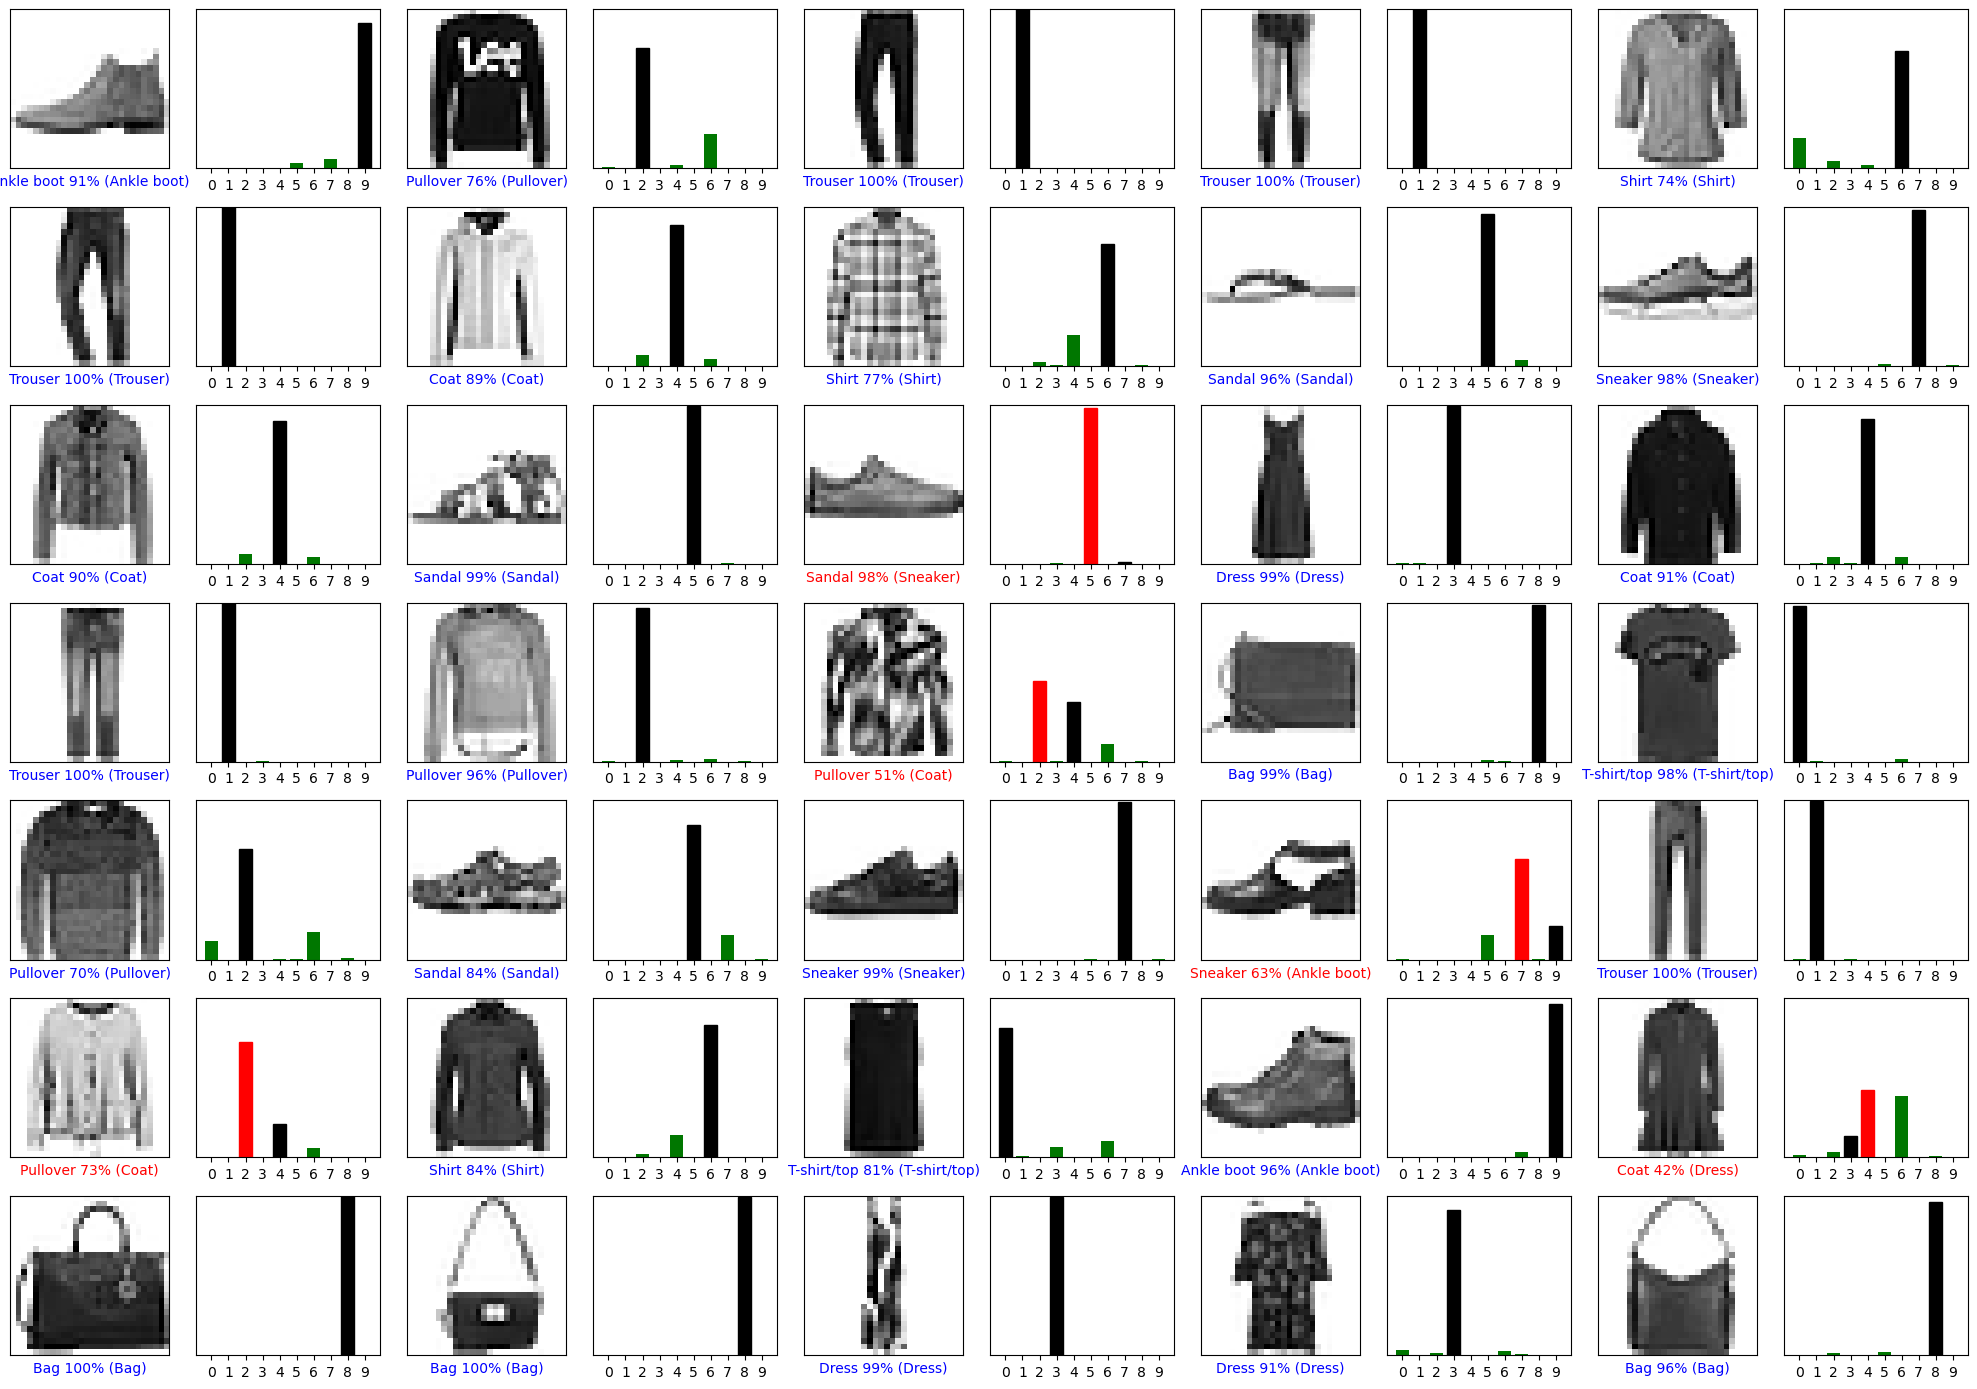


Fin del programa.


In [13]:
# Uso del modelo
print("Predict: hago que el modelo evalúe todas las imágenes de Test")
predictions = model.predict(test_images)

print(predictions[5])
print("El modelo reconoce: ", np.argmax(predictions[5]))
print("Etiqueta correcta: ", test_labels[5])      

i = 5
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i = 8
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

num_rows = 7
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

print("\nFin del programa.")